In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
import geopandas as gpd 

from shapely.geometry import Point

from functools import reduce

def merge_id(row):
    
    if pd.isnull(row['OME number']):
        return row['ML Number']
    elif pd.isnull(row['ML Number']):
        return row['OME number']

# deaths_roads_merged.to_csv('deaths_roads.csv')
# deaths_roads_merged.to_csv('deaths_towns.csv')
# deaths.to_csv('deaths_border.csv')
# deaths.to_csv('../migrant_deaths/data_for_each_death/deaths_cell_coverage.csv')
# deaths.to_csv('deaths_mountains.csv')

wall_length = pd.read_csv('../migrant_deaths_analysis/empty_border_by_year/empty_border_cor_year_1990.csv')

wall_length = wall_length[['CORNO','year','length','miles']]
wall_length=wall_length.rename(columns={"year": "Reporting_year"})
wall_length


CORNO  Reporting_year        length        miles
0      0.0            1990  2.642031e+06  1641.682070
1      1.0            1990  3.409124e+04    21.183317
2      2.0            1990  4.222988e+04    26.240431
3      3.0            1990  3.328413e+04    20.681801
4      4.0            1990  3.942159e+04    24.495439
5      5.0            1990  5.830441e+04    36.228682
6      6.0            1990  4.633747e+04    28.792771
7      7.0            1990  8.425416e+04    52.353108
8      8.0            1990  1.154239e+04     7.172110
9      9.0            1990  2.212171e+04    13.745794
10    10.0            1990  3.106330e+04    19.301838
11    11.0            1990  8.988665e+04    55.852975
12    12.0            1990  1.137583e+05    70.686104
13     0.0            1991  2.636996e+06  1638.553436
14     1.0            1991  3.409124e+04    21.183317
15     2.0            1991  4.222988e+04    26.240431
16     3.0            1991  3.328413e+04    20.681801
17     4.0            1991  3.942159e+04    24.495439
18     5.0            1991  5.830441e+04    36.228682
19     6.0            1991  4.633747e+04    28.792771
20     7.0            1991  8.425416e+04    52.353108
21     8.0            1991  1.154239e+04     7.172110
22     9.0            1991  2.212171e+04    13.745794
23    10.0            1991  3.106330e+04    19.301838
24    11.0            1991  8.988665e+04    55.852975
25    12.0            1991  1.137583e+05    70.686104
26     0.0            1992  2.625598e+06  1631.470861
27     1.0            1992  3.409124e+04    21.183317
28     2.0            1992  4.222988e+04    26.240431
29     3.0            1992  3.328413e+04    20.681801
30     4.0            1992  3.942159e+04    24.495439
31     5.0            1992  5.830441e+04    36.228682
32     6.0            1992  4.633747e+04    28.792771
33     7.0            1992  8.425416e+04    52.353108
34     8.0            1992  1.154239e+04     7.172110
35     9.0            1992  2.212171e+04    13.745794
36    10.0            1992  3.106330e+04    19.301838
37    11.0            1992  8.988665e+04    55.852975
38    12.0            1992  1.050874e+05    65.298263
39     0.0            1993  2.619830e+06  1627.886934
40     1.0            1993  3.409124e+04    21.183317
41     2.0            1993  4.222988e+04    26.240431
42     3.0            1993  3.328413e+04    20.681801
43     4.0            1993  3.942159e+04    24.495439
44     5.0            1993  5.830441e+04    36.228682
45     6.0            1993  4.633747e+04    28.792771
46     7.0            1993  8.425416e+04    52.353108
47     8.0            1993  1.154239e+04     7.172110
48     9.0            1993  2.212171e+04    13.745794
49    10.0            1993  3.106330e+04    19.301838
50    11.0            1993  8.988665e+04    55.852975
51    12.0            1993  1.050874e+05    65.298263
52     0.0            1994  2.614523e+06  1624.589384
53     1.0            1994  3.409124e+04    21.183317
54     2.0            1994  4.222988e+04    26.240431
55     3.0            1994  3.157259e+04    19.618300
56     4.0            1994  3.942159e+04    24.495439
57     5.0            1994  5.830441e+04    36.228682
58     6.0            1994  4.633747e+04    28.792771
59     7.0            1994  8.425416e+04    52.353108
60     8.0            1994  1.154239e+04     7.172110
61     9.0            1994  2.212171e+04    13.745794
62    10.0            1994  3.106330e+04    19.301838
63    11.0            1994  8.988665e+04    55.852975
64    12.0            1994  1.050874e+05    65.298263
65     0.0            1995  2.605671e+06  1619.088937
66     1.0            1995  3.409124e+04    21.183317
67     2.0            1995  4.222988e+04    26.240431
68     3.0            1995  3.157259e+04    19.618300
69     4.0            1995  3.942159e+04    24.495439
70     5.0            1995  5.830441e+04    36.228682
71     6.0            1995  4.633747e+04    28.792771
72     7.0            1995  8.425416e+04    52.353108
73     8.

In [164]:

deaths2 = gpd.read_file("../migrant_deaths_analysis/death_files/ogis_migrant_deaths_091021_with_yuma.geojson")

print(len(deaths2))

3914


In [165]:
#temp
deaths_min_max_temp = pd.read_csv('../migrant_deaths_analysis/min_max_temp/deaths_min_max_temp.csv')
print(len(deaths_min_max_temp))
deaths_min_max_temp['merge_id'] = deaths_min_max_temp.apply(lambda row : merge_id(row),axis=1)

# deaths['Reporting Date']= pd.to_datetime(deaths['Reporting Date'])
# deaths['Reporting_year']= pd.to_datetime(deaths['Reporting Date']).dt.year

deaths_min_max_temp = deaths_min_max_temp[['merge_id','max_temp','min_temp','Reporting_year']]

deaths_min_max_temp

3908


merge_id   max_temp   min_temp  Reporting_year
0       00-00097  20.664286   5.521410          2000.0
1       00-00148  16.373144  11.443297          2000.0
2       00-00189  24.196980   8.113583          2000.0
3       00-00222  21.976202   5.249127          2000.0
4       00-00245  22.456686   5.859336          2000.0
...          ...        ...        ...             ...
3903  2021-1110   44.711803  28.158911          2021.0
3904  2021-1115   46.367882  32.197136          2021.0
3905  2021-1121   40.887062  32.302067          2021.0
3906  2021-1139   32.326923  26.446465          2021.0
3907  2021-1141   32.326923  26.446465          2021.0

[3908 rows x 4 columns]

In [166]:
#roads
deaths_roads = pd.read_csv('../migrant_deaths_analysis/distance_from_roads_towns_border/roads/deaths_roads.csv')
print(len(deaths_roads))
deaths_roads['merge_id'] = deaths_roads.apply(lambda row : merge_id(row),axis=1)

deaths_roads = deaths_roads[['merge_id','road_distance_miles','Date']]


deaths_roads['Date']= pd.to_datetime(deaths_roads['Date'])
deaths_roads['month'] = deaths_roads['Date'].dt.month

deaths_roads

3910


/Users/adevoid/opt/anaconda3/envs/pyqgis-dev/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (7,14,26,27,28,55,81,94,102,103,110,112,113,114,117,119,122,124,131,132,133,134,138,140,144,145,176,178,183,193,232) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


merge_id  road_distance_miles       Date  month
0       00-00097             1.751221 2000-01-10    1.0
1       00-00148             6.097615 2000-01-22    1.0
2       00-00189             5.696042 2000-01-20    1.0
3       00-00222             0.004280 2000-01-10    1.0
4       00-00245             0.011787 2000-02-05    2.0
...          ...                  ...        ...    ...
3905  2021-1110              1.088106 2021-08-25    8.0
3906  2021-1115              2.251227 2021-08-27    8.0
3907  2021-1121              0.495243 2021-08-30    8.0
3908  2021-1139             22.395598 2021-08-31    8.0
3909  2021-1141             22.375193 2021-08-31    8.0

[3910 rows x 4 columns]

In [167]:
#towns 
deaths_towns = pd.read_csv('../migrant_deaths_analysis/distance_from_roads_towns_border/towns/deaths_towns.csv')
print(len(deaths_towns))
deaths_towns['merge_id'] = deaths_towns.apply(lambda row : merge_id(row),axis=1)


deaths_towns=deaths_towns.rename(columns={"road_distance_miles": "town_distance_miles"})
deaths_towns = deaths_towns[['merge_id','town_distance_miles']]

deaths_towns

3912


merge_id  town_distance_miles
0        00-00097             4.586541
1        00-00148            14.032261
2        00-00189            15.912426
3        00-00222             2.645468
4        00-00245            14.818621
...           ...                  ...
3907   2021-1141             31.439922
3908   2021-1182              0.847098
3909   2021-1183              1.293683
3910  2021-73360              0.801219
3911   2021-1186              3.591523

[3912 rows x 2 columns]

In [168]:
#border
deaths_border = pd.read_csv('../migrant_deaths_analysis/distance_from_roads_towns_border/border/deaths_border.csv')
print(len(deaths_border))
deaths_border['merge_id'] = deaths_border.apply(lambda row : merge_id(row),axis=1)

deaths_border = deaths_border[['merge_id','border_distance_miles','Longitude','Latitude']]





3872


In [169]:
#cell
deaths_cell_coverage = pd.read_csv('../migrant_deaths_analysis/deaths_in_cell_service/deaths_cell_coverage.csv')
print(len(deaths_cell_coverage))

def merge_id2(row):
    
    if pd.isnull(row['OME number']):
        return row['ML Number']
    elif pd.isnull(row['ML Number']):
        return row['OME number']



deaths_cell_coverage['merge_id'] = deaths_cell_coverage.apply(lambda row : merge_id(row),axis=1)

deaths_cell_coverage = deaths_cell_coverage[['merge_id','coverage total']]



3912


In [170]:
#mountains
deaths_mountains = pd.read_csv('../migrant_deaths_analysis/mountains/deaths_mountains.csv')
print(len(deaths_mountains))
deaths_mountains['merge_id'] = deaths_mountains.apply(lambda row : merge_id(row),axis=1)

deaths_mountains = deaths_mountains[['merge_id','mountains']]





3908


In [171]:
data_frames = [deaths_cell_coverage,deaths_roads,
               deaths_mountains,
               deaths_towns,
               deaths_min_max_temp,              
              deaths_border]

df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['merge_id'],
                                            how='left'), data_frames)

df_merged['Reporting_year'].isna().sum()

print(len(df_merged))

3912


In [172]:
df_merged.to_csv('../migrant_deaths_analysis/death_datapoints_merged.csv')

corridors = gpd.read_file('../migrant_deaths_analysis/empty_border_by_year/corridors/corridors_count_deaths_total.geojson',driver='GeoJSON')
sectors = gpd.read_file('../migrant_deaths_analysis/border_sectors/border_sectors.shp')
sectors = sectors.set_crs('epsg:4326')
corridors = corridors.set_crs('epsg:4326')


In [173]:





df_merged['Latitude']= df_merged.Latitude.astype(float)
df_merged['Longitude']= df_merged.Longitude.astype(float)
df_merged = gpd.GeoDataFrame(df_merged, geometry=gpd.points_from_xy(df_merged.Longitude,df_merged.Latitude))

df_merged


df_merged1 = df_merged[df_merged.is_valid]

# df_merged_not_valid = df_merged[df_merged.is_valid]

# def check_null(d):
#     if d['geometry'] == None:
#         return Point(nan, nan)
#     else:
#         return d['geometry']
    
# df_merged['geometry'] = df_merged.apply(lambda row : check_null(row),axis=1)    

print(df_merged['geometry'].isna().value_counts())


deaths_corridor1 = gpd.sjoin(df_merged1, corridors, how="inner", op='intersects')

deaths_corridor1= deaths_corridor1.set_crs('epsg:4326')

deaths_corridor1=deaths_corridor1.drop(['index_right'], axis=1)

deaths_corridor = gpd.sjoin(deaths_corridor1, sectors, how="inner", op='intersects')

deaths_corridor.to_csv('../migrant_deaths_analysis/death_datapoints_merged.csv')
deaths_corridor

pd.set_option('display.max_rows', 4000)

df_merged


False    3912
Name: geometry, dtype: int64


/Users/adevoid/opt/anaconda3/envs/pyqgis-dev/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326



merge_id  coverage total  road_distance_miles       Date  \
0                  00-00097               7             1.751221 2000-01-10   
1                  00-00148               4             6.097615 2000-01-22   
2                  00-00189               5             5.696042 2000-01-20   
3                  00-00222               4             0.004280 2000-01-10   
4                  00-00245               2             0.011787 2000-02-05   
5                  00-00246               2             0.014584 2000-02-05   
6                  00-00247               2             0.026114 2000-02-05   
7                  00-00248               2             0.023316 2000-02-05   
8                  00-00308               3             3.244729 2000-02-29   
9                  00-00401               7             0.100460 2000-02-29   
10                 00-00436               7             0.007524 2000-03-06   
11                 00-00437               7             0.003288 2000-03-06   
12                 00-00438               7             0.328740 2000-03-07   
13                 00-00525               3             7.649382 2000-03-20   
14                 00-00538               2            13.963431 2000-03-23   
15                 00-00561               7             0.100460 2000-03-30   
16                 00-00597               4             3.567150 2000-04-05   
17                 00-00681               2             0.897872 2000-04-14   
18                 00-00682               4             5.181400 2000-02-21   
19                 00-00685               7             0.012543 2000-04-16   
20                 00-00713               2             3.827424 2000-04-15   
21                 00-00741               7             1.006921 2000-04-27   
22                 00-00816               7             0.007344 2000-05-09   
23                 00-00818               7             0.109599 2000-05-09   
24                 00-00854               7             0.399563 2000-05-18   
25                 00-00873               5             0.022434 2000-05-21   
26                 00-00888               3             0.005076 2000-05-23   
27                 00-00913               2             2.613700 2000-05-29   
28                 00-00918               3             0.076549 2000-05-30   
29                 00-00923               7             0.100460 2000-05-30   
30                 00-00924               6             6.117861 2000-05-31   
31                 00-00927               7             0.000407 2000-05-31   
32                 00-00935               7             0.000581 2000-06-01   
33                 00-00941               3             1.434840 2000-06-03   
34                 00-00942               3             2.647421 2000-06-03   
35                 00-00946               7             0.012261 2000-06-03   
36                 00-00953               3             0.003059 2000-06-05   
37                 00-00964               7             0.001149 2000-06-06   
38                 00-00968               3             0.969857 2000-06-07   
39                 00-00969               7             0.100460 2000-06-06   
40                 00-00986               7             0.100460 2000-06-07   
41                 00-01021               3            13.058936 2000-06-14   
42                 00-01025               3            13.006528 2000-06-14   
43                 00-01035               3             7.845353 2000-06-15   
44                 00-01055               3             0.478279 2000-06-19   
45                 00-01104               7             0.072806 2000-06-26   
46                 00-01115               3             6.762427 2000-06-28   
47                 00-01233               7             2.234412 2000-07-17   
48                 00-01262               4             2.343716 2000-07-17   
49                 00-01269               2             4.803894 2000

In [174]:
pd.set_option('display.max_rows', 500)

deaths_corridor[deaths_corridor['Reporting_year']==2021]['CORNO'].value_counts(dropna=False)

7     69
10    21
5     20
11    16
6     12
12     8
8      8
9      7
2      6
3      5
1      4
4      1
Name: CORNO, dtype: int64

In [175]:
deaths_corridor['CORNO'].value_counts(dropna=False)

7     1392
6      546
5      381
10     366
9      320
8      267
4      192
11     105
12      56
3       39
2       29
1       21
Name: CORNO, dtype: int64

In [176]:
death_count = deaths_corridor.groupby(['Reporting_year', 'CORNO']).size().reset_index(name='death counts')

In [177]:

mean_datapoints = deaths_corridor.groupby(['Reporting_year', 'CORNO'])[["mountains", "coverage total", "town_distance_miles","road_distance_miles"]].mean()
median_datapoints = deaths_corridor.groupby(['Reporting_year', 'CORNO'])[["mountains", "coverage total", "town_distance_miles","road_distance_miles"]].median()
mean_datapoints=mean_datapoints.reset_index()

mean_datapoints


Reporting_year  CORNO  mountains  coverage total  town_distance_miles  \
0            1982.0      8   0.000000        7.000000            18.418180   
1            1985.0     10   0.000000        7.000000            38.487958   
2            1990.0      4   2.333333        6.666667             3.531710   
3            1990.0      6   0.000000        7.000000             1.141414   
4            1990.0      7   0.000000        7.000000             4.684160   
5            1990.0     11   0.000000        6.000000             0.306397   
6            1991.0      4   0.000000        7.000000             0.000000   
7            1991.0      7   2.000000        6.000000             8.015567   
8            1992.0      4   0.000000        7.000000             0.000000   
9            1992.0      6   1.250000        6.750000             9.701114   
10           1992.0      7   0.000000        0.000000            32.977163   
11           1993.0      2   0.000000        7.000000             0.000000   
12           1993.0      4   0.000000        7.000000             0.000000   
13           1993.0      5   2.500000        7.000000             5.385241   
14           1993.0      6   5.500000        6.500000            15.377744   
15           1993.0      7   4.285714        3.285714            19.914031   
16           1993.0      8   0.000000        2.000000            38.743579   
17           1994.0      5   5.000000        7.000000             0.000000   
18           1994.0      6   0.000000        7.000000             2.017873   
19           1995.0      4   0.000000        7.000000             0.000000   
20           1995.0      5   5.000000        7.000000             2.673120   
21           1995.0      6   2.000000        5.000000            21.196702   
22           1995.0      7   3.000000        5.000000             6.915588   
23           1995.0      9   0.000000        4.000000            10.713166   
24           1996.0      4   0.000000        7.000000             0.000000   
25           1996.0      5   6.000000        7.000000            13.732073   
26           1996.0      6   0.833333        6.166667             6.010567   
27           1996.0      7   4.000000        3.000000            11.687045   
28           1996.0      9   0.000000        4.000000            13.750390   
29           1997.0      4   0.000000        7.000000             0.000000   
30           1997.0      5   2.000000        7.000000             0.000000   
31           1997.0      6   5.000000        7.000000            17.032252   
32           1997.0      8   0.000000        3.000000            25.347563   
33           1997.0      9   1.000000        3.500000            14.259976   
34           1997.0     10   6.000000        0.000000            12.880817   
35           1997.0     11   0.000000        6.000000            35.362417   
36           1998.0      2   0.000000        7.000000             0.000000   
37           1998.0      4   0.000000        7.000000             0.054886   
38           1998.0      5   0.000000        7.000000             0.000000   
39           1998.0      6   5.000000        6.000000            19.784448   
40           1998.0      7   1.714286        3.428571            17.013120   
41           1998.0      9   3.000000        4.000000            17.899436   
42           1998.0     12   0.000000        6.000000             0.000000   
43           1999.0      4   0.000000        7.000000             0.000000   
44           1999.0      5   3.750000        7.000000             6.103497   
45           1999.0      6   3.000000        5.000000            19.064028   
46           1999.0      7   2.571429        4.000000            13.090801   
47           1999.0      8   0.000000        0.000000            35.991176   
48           1999.0      9   1.200000        3.800000            10.872761   
49           1999.0     10   6.000000        0.000000            24.522506   
50           1999.0     12 

In [178]:
median_datapoints=median_datapoints.reset_index()


staffing = pd.read_csv('../migrant_deaths_analysis/bp_stats/BP_staffing.csv')
staffing

Year  Tucson Sector staffing  Yuma Sector staffing
0   2019                    3695                   809
1   2018                    3681                   844
2   2017                    3691                   859
3   2016                    3834                   829
4   2015                    3962                   802
5   2014                    4042                   855
6   2013                    4135                   911
7   2012                    4176                   954
8   2011                    4239                   969
9   2010                    3353                   987
10  2009                    3318                   972
11  2008                    3049                   932
12  2007                    2806                   825
13  2006                    2595                   774
14  2005                    2324                   547
15  2004                    2104                   331
16  2003                    1838                   358
17  2002                    1626                   323
18  2001                    1686                   323
19  2000                    1548                   313
20  1999                    1328                   228
21  1998                    1013                   227
22  1997                     875                   175
23  1996                     702                   174
24  1995                     407                   185
25  1994                     282                   182
26  1993                     287                   182
27  1992                     300                   195

In [179]:
encounters = pd.read_csv('../migrant_deaths_analysis/bp_stats/BP_encounters.csv')

# staffing = pd.read_csv('../migrant_deaths/data_for_each_death/BP_staffing_estimate_2020_2021.csv')
staffing = pd.read_csv('../migrant_deaths_analysis/bp_stats/BP_staffing.csv')

staffing=staffing.rename(columns={"Year": "Reporting_year"})

encounters=encounters.rename(columns={"Year": "Reporting_year"})

encounters['az_encounters']=encounters['Yuma Border encounters']+encounters['Tucson Border encounters']
staffing['az_staffing']=staffing['Tucson Sector staffing']+staffing['Yuma Sector staffing']

staffing = staffing[['Reporting_year',"az_staffing"]]
encounters = encounters[['Reporting_year',"az_encounters"]]

staffing.head(1)

Reporting_year  az_staffing
0            2019         4504

In [180]:
staffing


Reporting_year  az_staffing
0             2019         4504
1             2018         4525
2             2017         4550
3             2016         4663
4             2015         4764
5             2014         4897
6             2013         5046
7             2012         5130
8             2011         5208
9             2010         4340
10            2009         4290
11            2008         3981
12            2007         3631
13            2006         3369
14            2005         2871
15            2004         2435
16            2003         2196
17            2002         1949
18            2001         2009
19            2000         1861
20            1999         1556
21            1998         1240
22            1997         1050
23            1996          876
24            1995          592
25            1994          464
26            1993          469
27            1992          495

In [181]:


# staffing=staffing.rename(columns={"Year": "Reporting_year"})

# encounters=encounters.rename(columns={"Year": "Reporting_year"})

# encounters_tucson= encounters[['Reporting_year','Tucson Border encounters']]

# encounters_tucson=encounters_tucson.rename(columns={"Tucson Border encounters": "Border_encounters"})

# encounters_tucson['SEC_NAME'] ='Tucson'


# encounters_yuma= encounters[['Reporting_year','Yuma Border encounters']]

# encounters_yuma =encounters_yuma.rename(columns={"Yuma Border encounters": "Border_encounters"})

# encounters_yuma['SEC_NAME'] ='Yuma'
# # staffing
# staffing_tucson= staffing[['Reporting_year','Tucson Sector staffing']]

# staffing_tucson =staffing_tucson.rename(columns={"Tucson Sector staffing": "Sector_staffing"})  

# staffing_tucson['SEC_NAME'] ='Tucson'


# staffing_yuma= staffing[['Reporting_year','Yuma Sector staffing']]

# staffing_yuma =staffing_yuma.rename(columns={"Yuma Sector staffing": "Sector_staffing"})  

# staffing_yuma['SEC_NAME'] ='Yuma'

# staffing=pd.concat([staffing_yuma, staffing_tucson])
# encounters=pd.concat([encounters_yuma, encounters_tucson])

# median_datapoints = median_datapoints.merge(encounters,on=['Reporting_year','SEC_NAME'])
# median_datapoints = median_datapoints.merge(staffing,on=['Reporting_year','SEC_NAME'])

# mean_datapoints = mean_datapoints.merge(encounters,on=['Reporting_year','SEC_NAME'])
# mean_datapoints = mean_datapoints.merge(staffing,on=['Reporting_year','SEC_NAME'])


median_datapoints = median_datapoints.merge(wall_length,on=['Reporting_year','CORNO'],how='right')

mean_datapoints = mean_datapoints.merge(wall_length,on=['Reporting_year','CORNO'],how='right')



mean_datapoints = mean_datapoints.merge(death_count,on=['Reporting_year','CORNO'],how='left')


median_datapoints = median_datapoints.merge(death_count,on=['Reporting_year','CORNO'],how='left')


mean_datapoints = mean_datapoints.merge(encounters,on=['Reporting_year'],how='left')


median_datapoints = median_datapoints.merge(encounters,on=['Reporting_year'],how='left')

mean_datapoints = mean_datapoints.merge(staffing,on=['Reporting_year'],how='left')


median_datapoints = median_datapoints.merge(staffing,on=['Reporting_year'],how='left')

median_datapoints['death counts']=median_datapoints['death counts'].fillna(0)
mean_datapoints['death counts']=mean_datapoints['death counts'].fillna(0)


In [182]:
mean_datapoints=mean_datapoints[mean_datapoints['CORNO']!=0]
mean_datapoints=mean_datapoints.rename(columns={"death counts": "death_counts"})



In [183]:
mean_datapoints[mean_datapoints.duplicated(subset=['Reporting_year','CORNO'], keep=False)]

Empty DataFrame
Columns: [Reporting_year, CORNO, mountains, coverage total, town_distance_miles, road_distance_miles, length, miles, death_counts, az_encounters, az_staffing]
Index: []

In [184]:
median_datapoints=median_datapoints[median_datapoints['CORNO']!=0]
median_datapoints=median_datapoints.rename(columns={"death counts": "death_counts"})
median_datapoints.to_csv('median_death_datapoints.csv')
median_datapoints[median_datapoints.duplicated(subset=['Reporting_year','CORNO'], keep=False)]

Empty DataFrame
Columns: [Reporting_year, CORNO, mountains, coverage total, town_distance_miles, road_distance_miles, length, miles, death_counts, az_encounters, az_staffing]
Index: []

In [185]:
border_by_corridor = gpd.read_file('../migrant_deaths_analysis/empty_border_by_year/corridors/border_by_corridors.geojson')
border_by_corridor=border_by_corridor.to_crs(epsg=26912)
border_by_corridor['length'] = border_by_corridor['geometry'].length

border_by_corridor['total_border_miles']=border_by_corridor['length']*0.000621371192  

total_border_by_corridor = border_by_corridor.groupby('FID')['total_border_miles'].sum().to_frame().reset_index()
total_border_by_corridor

total_border_by_corridor=total_border_by_corridor.rename(columns={"FID": "CORNO"})
total_border_by_corridor

mean_datapoints = mean_datapoints.merge(total_border_by_corridor,on='CORNO',how='left')


border_by_corridor[border_by_corridor['FID'] != 0]['total_border_miles'].sum()



376.9695835742086

In [186]:
year_sum = mean_datapoints.groupby('Reporting_year')['miles'].sum().to_frame().reset_index()

year_sum=year_sum.rename(columns={"miles": "total_unwalled_miles"})

mean_datapoints = mean_datapoints.merge(year_sum,on='Reporting_year',how='left')

mean_datapoints['percent_unwalled_border'] = mean_datapoints['miles']/mean_datapoints['total_unwalled_miles']

mean_datapoints

mean_datapoints.to_csv('../migrant_deaths_analysis/mean_death_datapoints.csv')

In [187]:

median_distnace_town1 = median_datapoints[['Reporting_year','CORNO','town_distance_miles']]

median_distnace_town1= median_distnace_town1.rename(columns={"town_distance_miles": "town_distance_miles_median"})

mean_datapoints = mean_datapoints.merge(median_distnace_town1,on=['Reporting_year','CORNO'],how='left')

mean_datapoints.to_csv('../migrant_deaths_analysis/mean_median_death_datapoints.csv')




mean_datapoints


Reporting_year  CORNO  mountains  coverage total  town_distance_miles  \
0            1990.0    1.0        NaN             NaN                  NaN   
1            1990.0    2.0        NaN             NaN                  NaN   
2            1990.0    3.0        NaN             NaN                  NaN   
3            1990.0    4.0   2.333333        6.666667             3.531710   
4            1990.0    5.0        NaN             NaN                  NaN   
5            1990.0    6.0   0.000000        7.000000             1.141414   
6            1990.0    7.0   0.000000        7.000000             4.684160   
7            1990.0    8.0        NaN             NaN                  NaN   
8            1990.0    9.0        NaN             NaN                  NaN   
9            1990.0   10.0        NaN             NaN                  NaN   
10           1990.0   11.0   0.000000        6.000000             0.306397   
11           1990.0   12.0        NaN             NaN                  NaN   
12           1991.0    1.0        NaN             NaN                  NaN   
13           1991.0    2.0        NaN             NaN                  NaN   
14           1991.0    3.0        NaN             NaN                  NaN   
15           1991.0    4.0   0.000000        7.000000             0.000000   
16           1991.0    5.0        NaN             NaN                  NaN   
17           1991.0    6.0        NaN             NaN                  NaN   
18           1991.0    7.0   2.000000        6.000000             8.015567   
19           1991.0    8.0        NaN             NaN                  NaN   
20           1991.0    9.0        NaN             NaN                  NaN   
21           1991.0   10.0        NaN             NaN                  NaN   
22           1991.0   11.0        NaN             NaN                  NaN   
23           1991.0   12.0        NaN             NaN                  NaN   
24           1992.0    1.0        NaN             NaN                  NaN   
25           1992.0    2.0        NaN             NaN                  NaN   
26           1992.0    3.0        NaN             NaN                  NaN   
27           1992.0    4.0   0.000000        7.000000             0.000000   
28           1992.0    5.0        NaN             NaN                  NaN   
29           1992.0    6.0   1.250000        6.750000             9.701114   
30           1992.0    7.0   0.000000        0.000000            32.977163   
31           1992.0    8.0        NaN             NaN                  NaN   
32           1992.0    9.0        NaN             NaN                  NaN   
33           1992.0   10.0        NaN             NaN                  NaN   
34           1992.0   11.0        NaN             NaN                  NaN   
35           1992.0   12.0        NaN             NaN                  NaN   
36           1993.0    1.0        NaN             NaN                  NaN   
37           1993.0    2.0   0.000000        7.000000             0.000000   
38           1993.0    3.0        NaN             NaN                  NaN   
39           1993.0    4.0   0.000000        7.000000             0.000000   
40           1993.0    5.0   2.500000        7.000000             5.385241   
41           1993.0    6.0   5.500000        6.500000            15.377744   
42           1993.0    7.0   4.285714        3.285714            19.914031   
43           1993.0    8.0   0.000000        2.000000            38.743579   
44           1993.0    9.0        NaN             NaN                  NaN   
45           1993.0   10.0        NaN             NaN                  NaN   
46           1993.0   11.0        NaN             NaN                  NaN   
47           1993.0   12.0        NaN             NaN                  NaN   
48           1994.0    1.0        NaN             NaN                  NaN   
49           1994.0    2.0        NaN             NaN                  NaN   
50           1994.0    3.0 

In [188]:
mean_datapoints[mean_datapoints['Reporting_year']==2021]

Reporting_year  CORNO  mountains  coverage total  town_distance_miles  \
372          2021.0    1.0   3.500000        2.000000            17.936274   
373          2021.0    2.0   3.666667        6.666667             4.624385   
374          2021.0    3.0   0.000000        6.800000             3.611889   
375          2021.0    4.0   0.000000        7.000000             0.000000   
376          2021.0    5.0   3.550000        6.300000             9.762656   
377          2021.0    6.0   3.666667        5.166667            17.873320   
378          2021.0    7.0   1.521739        2.637681            15.138567   
379          2021.0    8.0   3.000000        2.125000            32.036822   
380          2021.0    9.0   3.428571        4.000000            26.124922   
381          2021.0   10.0   3.714286        0.095238            20.383478   
382          2021.0   11.0   1.500000        0.562500            31.212607   
383          2021.0   12.0   0.000000        5.875000             7.951721   

     road_distance_miles        length      miles  death_counts  \
372             1.803850    413.458882   0.256911           4.0   
373             0.271904    223.261067   0.138728           6.0   
374             1.172887     66.807493   0.041512           5.0   
375             0.100460  31169.661256  19.367930           1.0   
376             1.396898  10671.257962   6.630812          20.0   
377             2.975431   6171.375675   3.834715          12.0   
378             4.115903  84254.161070  52.353108          69.0   
379            10.976260  11542.392641   7.172110           8.0   
380             3.186418    882.784880   0.548537           7.0   
381            13.256221      0.023748   0.000015          21.0   
382            13.079132  19643.970328  12.206197          16.0   
383             3.054122  29089.887987  18.075618           8.0   

     az_encounters  az_staffing  total_border_miles  total_unwalled_miles  \
372       265317.0          NaN           21.183317            120.626195   
373       265317.0          NaN           26.240431            120.626195   
374       265317.0          NaN           20.681801            120.626195   
375       265317.0          NaN           24.495439            120.626195   
376       265317.0          NaN           36.228682            120.626195   
377       265317.0          NaN           28.792771            120.626195   
378       265317.0          NaN           52.353108            120.626195   
379       265317.0          NaN            7.172110            120.626195   
380       265317.0          NaN           13.745794            120.626195   
381       265317.0          NaN           19.301838            120.626195   
382       265317.0          NaN           55.852975            120.626195   
383       265317.0          NaN           70.921316            120.626195   

     percent_unwalled_border  town_distance_miles_median  
372             2.129815e-03                   16.510751  
373             1.150065e-03                    2.737525  
374             3.441396e-04                    3.335076  
375             1.605616e-01                    0.000000  
376             5.496992e-02                    9.420799  
377             3.179007e-02                   20.822556  
378             4.340111e-01                   15.714918  
379             5.945732e-02                   32.212554  
380             4.547413e-03                   29.417776  
381             1.223314e-07                   17.792098  
382             1.011903e-01                   28.105088  
383             1.498482e-01                    6.833506

Reporting_year  CORNO  mountains  coverage total  town_distance_miles  \
6            1990.0    7.0   0.000000        7.000000             4.684160   
18           1991.0    7.0   2.000000        6.000000             8.015567   
30           1992.0    7.0   0.000000        0.000000            32.977163   
42           1993.0    7.0   4.285714        3.285714            19.914031   
54           1994.0    7.0        NaN             NaN                  NaN   
66           1995.0    7.0   3.000000        5.000000             6.915588   
78           1996.0    7.0   4.000000        3.000000            11.687045   
90           1997.0    7.0        NaN             NaN                  NaN   
102          1998.0    7.0   1.714286        3.428571            17.013120   
114          1999.0    7.0   2.571429        4.000000            13.090801   
126          2000.0    7.0   2.470588        3.058824            13.110767   
138          2001.0    7.0   2.896552        3.724138            11.226765   
150          2002.0    7.0   2.511628        3.046512            11.986101   
162          2003.0    7.0   2.276316        3.407895            14.842958   
174          2004.0    7.0   1.920000        3.620000            12.550654   
186          2005.0    7.0   1.655738        3.540984            12.241923   
198          2006.0    7.0   1.826087        3.521739            11.366671   
210          2007.0    7.0   1.696629        3.325843            12.603030   
222          2008.0    7.0   1.983333        3.733333            13.161110   
234          2009.0    7.0   2.027397        3.726027            13.911906   
246          2010.0    7.0   1.981132        3.028302            15.429365   
258          2011.0    7.0   2.189873        3.139241            15.930085   
270          2012.0    7.0   2.025316        3.189873            15.351687   
282          2013.0    7.0   2.630769        2.953846            16.967598   
294          2014.0    7.0   1.872340        3.000000            15.341478   
306          2015.0    7.0   1.653061        3.102041            15.666262   
318          2016.0    7.0   1.706897        2.517241            15.190565   
330          2017.0    7.0   1.800000        2.566667            15.971995   
342          2018.0    7.0   2.285714        2.690476            14.539851   
354          2019.0    7.0   1.816327        2.673469            16.506934   
366          2020.0    7.0   2.298701        2.441558            15.669752   
378          2021.0    7.0   1.521739        2.637681            15.138567   

     road_distance_miles       length      miles  death_counts  az_encounters  \
6               0.018810  84254.16107  52.353108           2.0        89448.0   
18              4.578293  84254.16107  52.353108           3.0        88374.0   
30              6.677726  84254.16107  52.353108           1.0        95928.0   
42              7.383914  84254.16107  52.353108           7.0       116187.0   
54                   NaN  84254.16107  52.353108           0.0       160684.0   
66              0.668335  84254.16107  52.353108           2.0       248423.0   
78              5.643848  84254.16107  52.353108           3.0       333658.0   
90                   NaN  84254.16107  52.353108           0.0       302574.0   
102             6.223777  84254.16107  52.353108           7.0       463601.0   
114             3.671508  84254.16107  52.353108           7.0       563837.0   
126             1.886021  84254.16107  52.353108          17.0       725093.0   
138             3.168521  84254.16107  52.353108          29.0       528060.0   
150             2.543847  84254.16107  52.353108          86.0       376302.0   
162             3.884879  84254.16107  52.353108          76.0       403901.0   
174             2.639885  84254.16107  52.353108          50.0       589831.0   
186             3.261101  84254.16107  52.353108          61.0       577517.0   
198             3.253669  84254.16107  52.353108     

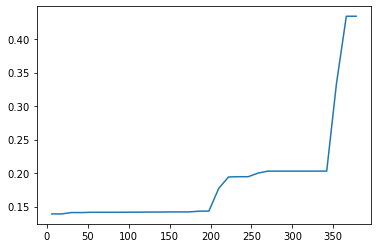

In [189]:
mean_datapoints[mean_datapoints['CORNO'] == 7]['percent_unwalled_border'].plot()

mean_datapoints[mean_datapoints['CORNO'] == 7]

In [190]:
print(52.353108 / (125.307396))
print(52.353108 / (125.307396-3.5))

print(128.3801813292641-125.307396)
print((52.353108*100)/(41.77974299298343-1))



print(125.307396/376.7002607222679)
print(380.7002607222679-125.307396)
print(1-.33264483480776286)

0.4177974299298343
0.42980237423349893
3.072785329264107
128.3801813292641
0.33264483480776286
255.39286472226792
0.6673551651922371


7      0.019038
19     0.019038
31     0.019314
43     0.019314
55     0.019369
67     0.019369
79     0.019369
91     0.019373
103    0.019391
115    0.019399
127    0.019422
139    0.019422
151    0.019446
163    0.019446
175    0.019446
187    0.019598
199    0.019617
211    0.024248
223    0.026590
235    0.026646
247    0.026646
259    0.027379
271    0.027787
283    0.027787
295    0.027787
307    0.027790
319    0.027790
331    0.027790
343    0.027790
355    0.045783
367    0.059457
379    0.059457
Name: percent_unwalled_border, dtype: float64

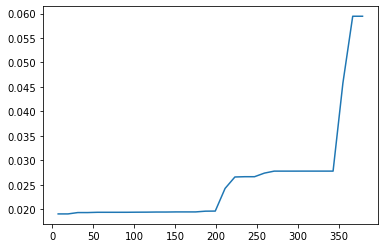

In [191]:
mean_datapoints[mean_datapoints['CORNO'] == 8]['percent_unwalled_border'].plot()
mean_datapoints[mean_datapoints['CORNO'] == 8]['percent_unwalled_border']

In [192]:
mean_datapoints

mean_datapoints[mean_datapoints.duplicated(subset=['Reporting_year','CORNO'], keep=False)]

Empty DataFrame
Columns: [Reporting_year, CORNO, mountains, coverage total, town_distance_miles, road_distance_miles, length, miles, death_counts, az_encounters, az_staffing, total_border_miles, total_unwalled_miles, percent_unwalled_border, town_distance_miles_median]
Index: []

In [193]:


# median_datapoints.to_file("../migrant_deaths/data_for_each_death/all_datapoints_for_each_death.csv")





In [194]:
# corrs = pd.read_csv('../migrant_deaths/analysis/merge_wall_deaths.csv')

# corrs



In [195]:
df_merged

merge_id  coverage total  road_distance_miles       Date  month  \
0        00-00097               7             1.751221 2000-01-10    1.0   
1        00-00148               4             6.097615 2000-01-22    1.0   
2        00-00189               5             5.696042 2000-01-20    1.0   
3        00-00222               4             0.004280 2000-01-10    1.0   
4        00-00245               2             0.011787 2000-02-05    2.0   
...           ...             ...                  ...        ...    ...   
3907   2021-1141                0            22.375193 2021-08-31    8.0   
3908   2021-1182                6                  NaN        NaT    NaN   
3909   2021-1183                7                  NaN        NaT    NaN   
3910  2021-73360                7                  NaN        NaT    NaN   
3911   2021-1186                6                  NaN        NaT    NaN   

      mountains  town_distance_miles   max_temp   min_temp  Reporting_year  \
0           0.0             4.586541  20.664286   5.521410          2000.0   
1           4.0            14.032261  16.373144  11.443297          2000.0   
2           5.0            15.912426  24.196980   8.113583          2000.0   
3           6.0             2.645468  21.976202   5.249127          2000.0   
4           0.0            14.818621  22.456686   5.859336          2000.0   
...         ...                  ...        ...        ...             ...   
3907        0.0            31.439922  32.326923  26.446465          2021.0   
3908        NaN             0.847098        NaN        NaN             NaN   
3909        NaN             1.293683        NaN        NaN             NaN   
3910        NaN             0.801219        NaN        NaN             NaN   
3911        NaN             3.591523        NaN        NaN             NaN   

      border_distance_miles   Longitude   Latitude  \
0                  0.010159 -114.799807  32.589668   
1                 33.027764 -110.483205  31.812406   
2                 13.603753 -111.151300  31.568000   
3                 30.697289 -112.826855  32.355997   
4                 10.355888 -111.779830  31.717790   
...                     ...         ...        ...   
3907                    NaN         NaN        NaN   
3908                    NaN         NaN        NaN   
3909                    NaN         NaN        NaN   
3910                    NaN         NaN        NaN   
3911                    NaN         NaN        NaN   

                         geometry  
0     POINT (-114.79981 32.58967)  
1     POINT (-110.48320 31.81241)  
2     POINT (-111.15130 31.56800)  
3     POINT (-112.82685 32.35600)  
4     POINT (-111.77983 31.71779)  
...                           ...  
3907              POINT (nan nan)  
3908              POINT (nan nan)  
3909              POINT (nan nan)  
3910              POINT (nan nan)  
3911              POINT (nan nan)  

[3912 rows x 14 columns]